# Example for the Beijing Air Quality 2.5 Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [49]:
import sys
import dill

import numpy as np
import pandas as pd

from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

from sklearn import linear_model, metrics

import warnings
# Filter out all RuntimeWarning
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import logging 
logging.getLogger('stumpy').setLevel(logging.ERROR)

sys.path.insert(0, './../../')

from tsmule.xai.lime import LimeTS
from tsmule.xai.evaluation import PerturbationAnalysis

In [3]:
cnn_model = keras.models.load_model('./beijing_air_2_5_cnn_model.h5')
dnn_model = keras.models.load_model('./beijing_air_2_5_dnn_model.h5')
rnn_model = keras.models.load_model('./beijing_air_2_5_rnn_model.h5')

with open('./beijing_air_2_5_test_data.dill', 'rb') as f:
    dataset_test = dill.load(f)

## Take samples and visualize first one

In [39]:
X = dataset_test[0][:25]
y = dataset_test[1][:25]

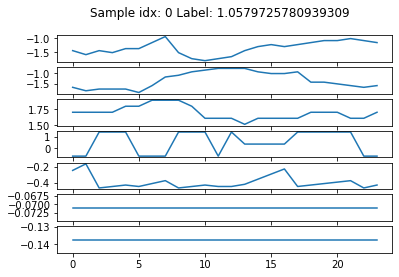

In [17]:
idx = 0

sample = X[idx]
label = y[idx]

_, features = sample.shape
fig, axs = plt.subplots(features)
for i in range(features):
    axs[i].plot(sample[:, i])
fig.suptitle('Sample idx: ' + str(idx) + ' Label: ' + str(label))
plt.show()

## Create explanations

In [50]:
def predict_fn(x):
    if len(x.shape) == 2:
        prediction = cnn_model.predict(x[np.newaxis]).ravel()
    else:
        prediction = cnn_model.predict(x).ravel()
    return prediction

relevance = []
for x in tqdm(X):
    explainer = LimeTS()
    relevance.append(explainer.explain(x, predict_fn))

100%|██████████| 25/25 [01:43<00:00,  4.15s/it]


## Evaluate explanations

In [41]:
pa = PerturbationAnalysis()
scores = pa.analysis_relevance(X, y, relevance,
                        predict_fn=predict_fn,
                        replace_method='zeros',
                        eval_fn=metrics.mean_squared_error,
                        percentile=90
                        )
scores

{'original': 6.270280191129176,
 'percentile': 9.59916518972939,
 'random': 7.6859297691343205}

In [42]:
pa = PerturbationAnalysis()
scores = pa.analysis_relevance(X, y, relevance,
                        predict_fn=predict_fn,
                        replace_method='global_mean',
                        eval_fn=metrics.mean_squared_error,
                        percentile=90
                        )
scores

{'original': 6.270280191129176,
 'percentile': 6.413619932154732,
 'random': 5.607940288331703}

In [46]:
pa = PerturbationAnalysis()
scores = pa.analysis_relevance(X, y, relevance, 
                        predict_fn=predict_fn,
                        replace_method='inverse_max',
                        eval_fn=metrics.mean_squared_error,
                        percentile=90
                        )
scores

{'original': 6.270280191129176,
 'percentile': 9.60028644769254,
 'random': 8.068558167656011}

In [47]:
pa = PerturbationAnalysis()
scores = pa.analysis_relevance(X, y, relevance, 
                        predict_fn=predict_fn,
                        replace_method='inverse_mean',
                        eval_fn=metrics.mean_squared_error,
                        percentile=90
                        )
scores

{'original': 6.270280191129176,
 'percentile': 10.03825101828024,
 'random': 9.875862491057985}

In [43]:
pa = PerturbationAnalysis()
scores = pa.analysis_relevance(X, y, relevance, 
                        predict_fn=predict_fn,
                        replace_method='local_mean',
                        eval_fn=metrics.mean_squared_error,
                        percentile=90
                        )
scores

TypeError: local_mean() missing 1 required positional argument: 'segments'